### Oct Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.options.display.float_format = '{:,}'.format

In [2]:
df1 = pd.read_csv('/data/2019-Oct.csv')

In [3]:
df1.shape

(42448764, 9)

In [4]:
df1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.2,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.1,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,"1,081.98",535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [8]:
df1.describe()

,product_id,category_id,price,user_id
count,"42,448,764.0","42,448,764.0","42,448,764.0","42,448,764.0"
mean,"10,549,932.375842676",2.0574042379407987e+18,290.3236606849143,"533,537,147.50816935"
std,"11,881,906.970608113",1.843926466140415e+16,358.26915533940263,"18,523,738.17465412"
min,"1,000,978.0",2.0530135522261076e+18,0.0,"33,869,381.0"
25%,"1,005,157.0",2.0530135554641106e+18,65.98,"515,904,318.0"
50%,"5,000,470.0",2.0530135556318828e+18,162.93,"529,696,452.0"
75%,"16,000,305.0",2.0530135634248998e+18,358.57,"551,578,838.25"
max,"60,500,010.0",2.1754195950939676e+18,"2,574.07","566,280,860.0"


In [9]:
df1.nunique()

event_time       2621538
event_type             3
product_id        166794
category_id          624
category_code        126
brand               3444
price              65298
user_id          3022290
user_session     9244421
dtype: int64

In [10]:
df1.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [11]:
num_users = df1['user_id'].nunique()
num_products = df1['product_id'].nunique()
num_categories = df1['category_id'].nunique()
num_taxonomies = df1['category_code'].nunique()
num_brands = df1['brand'].nunique()
print('Total number of users: ',num_users)
print('Total number of products: ', num_products)
print('Total number of categories: ', num_categories)
print('Total number of taxonomies: ', num_taxonomies)
print('Total number of brands: ', num_brands)

Total number of users:  3022290
Total number of products:  166794
Total number of categories:  624
Total number of taxonomies:  126
Total number of brands:  3444


In [6]:
# converting event time to date and hour only
df1.insert(loc= 1,column ='date_utc' ,value = pd.to_datetime(df1['event_time'].apply(lambda s: str(s)[0:10])))
df1.insert(loc= 2,column ='hour' ,value = (df1['event_time'].apply(lambda s: str(s)[11:13])).astype('uint8'))
df1 = df1.drop('event_time', axis=1)
df1

,date_utc,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01,0,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01,0,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.2,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01,0,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.1,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01,0,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01,0,view,1004237,2053013555631882655,electronics.smartphone,apple,"1,081.98",535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31,23,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.4,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31,23,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31,23,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.7,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31,23,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


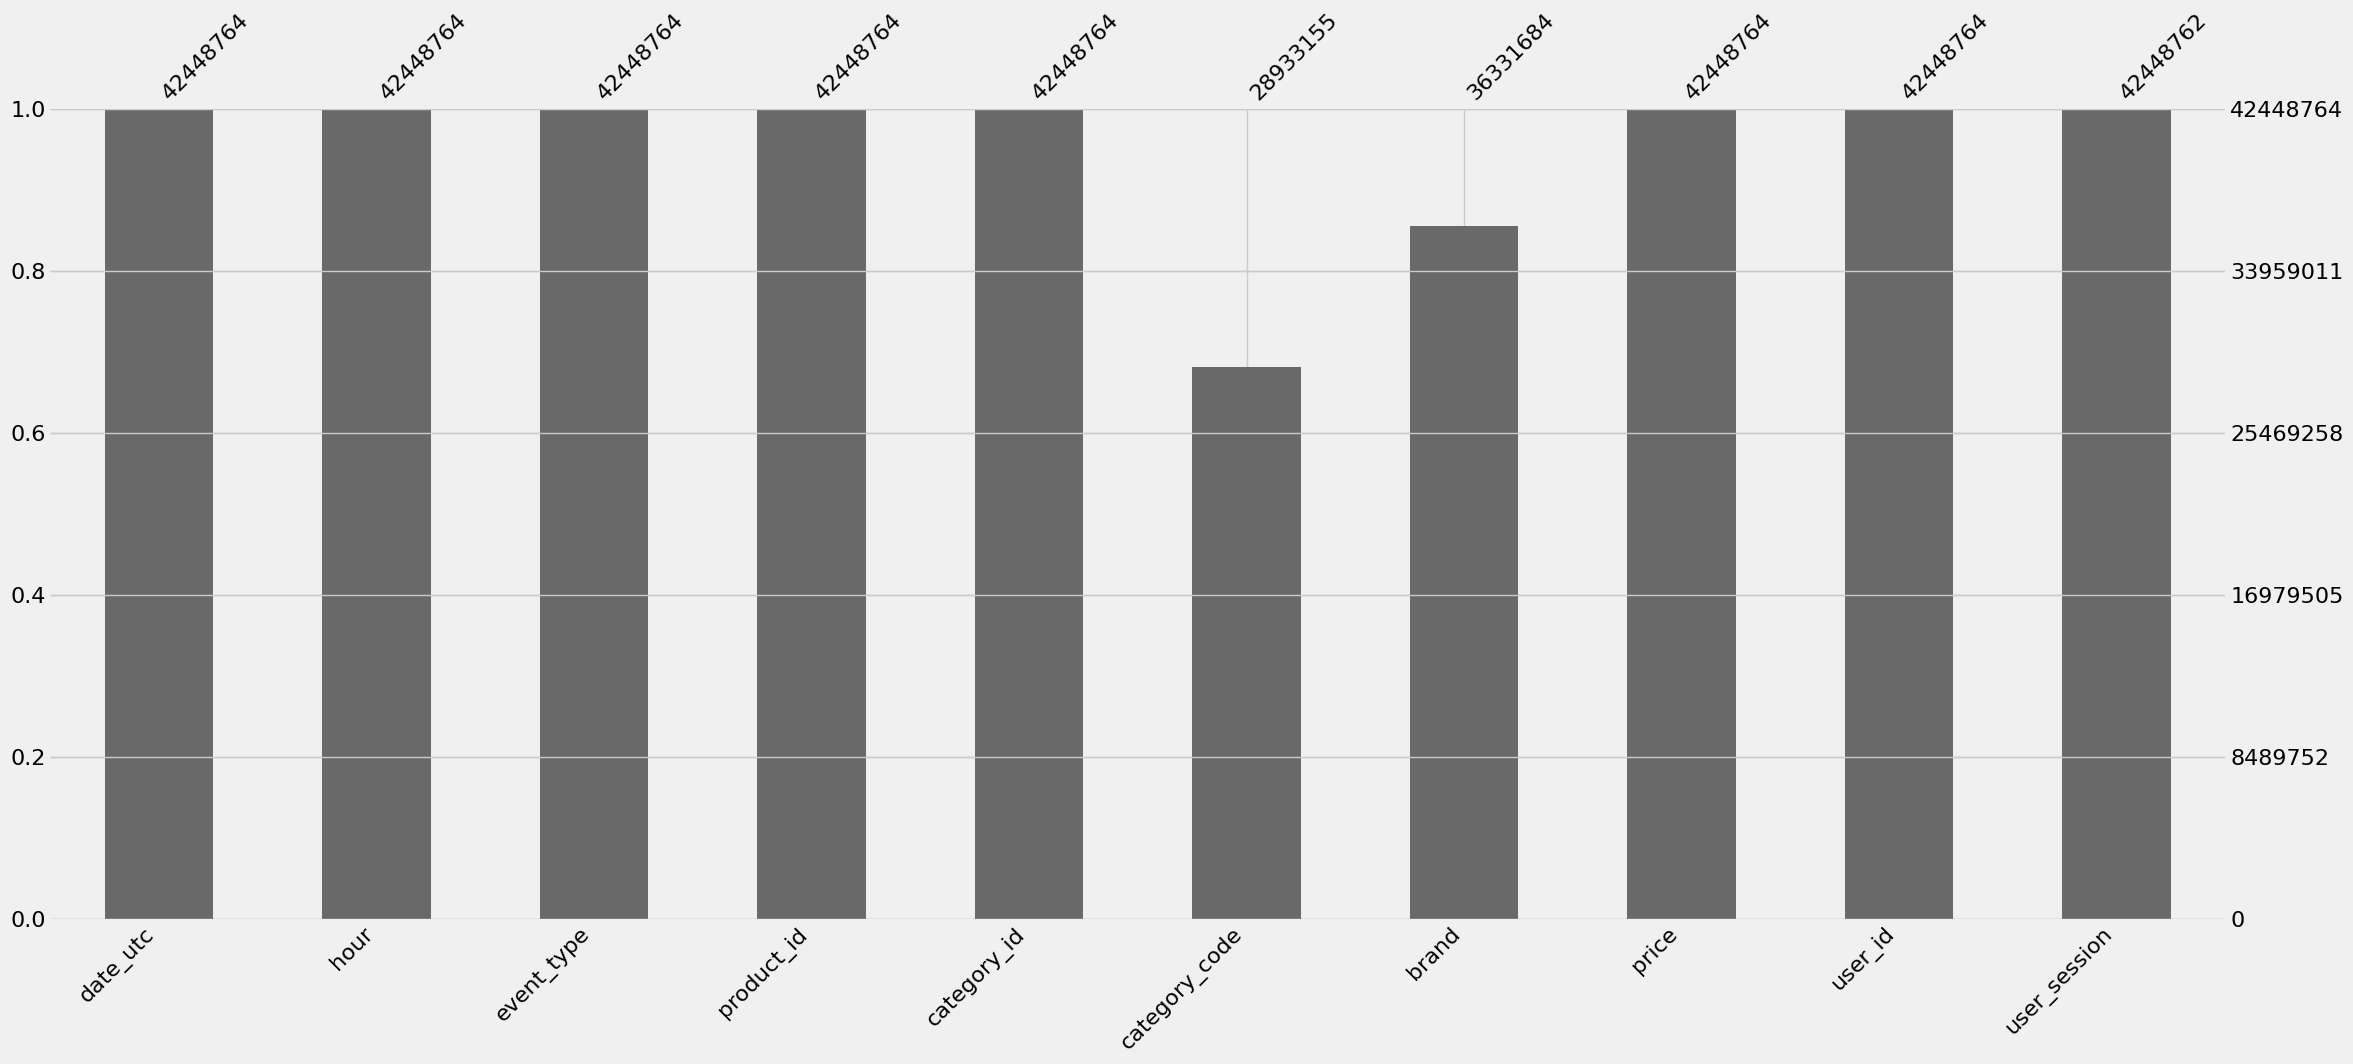

In [13]:
# visualizing null values
msno.bar(df1)
plt.show()

In [7]:
df1 = df1.fillna('unknown')
df1.isna().sum()

date_utc         0
hour             0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [8]:
df1.drop_duplicates()

,date_utc,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01,0,view,44600062,2103807459595387724,unknown,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01,0,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.2,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01,0,view,17200506,2053013559792632471,furniture.living_room.sofa,unknown,543.1,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01,0,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01,0,view,1004237,2053013555631882655,electronics.smartphone,apple,"1,081.98",535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...,...
42448757,2019-10-31,23,view,1004870,2053013555631882655,electronics.smartphone,samsung,275.25,518956209,6764041a-9285-4869-8a32-a79adf31d212
42448758,2019-10-31,23,view,2702331,2053013563911439225,appliances.kitchen.refrigerators,lg,527.43,524356542,153f9818-4d32-4e8b-ba9f-f355094e8ae4
42448759,2019-10-31,23,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.4,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31,23,view,10800172,2053013554994348409,unknown,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8


In [16]:
visitors = (df1.groupby('event_type')
            ['user_id'].agg(['count'])
            .sort_values(by='count', ascending=False)
            .rename(columns={"count":"count_of_users"})
            .reset_index())
visitors['prcnt'] = (100 * visitors['count_of_users'] / visitors['count_of_users'].sum()).round(1)
print(visitors)

px.pie(visitors, values='prcnt', names='event_type' ,template='plotly_dark')

  event_type  count_of_users  prcnt
0       view        40779399   96.1
1       cart          926516    2.2
2   purchase          742849    1.7


In [9]:
# engagement of customers towards the store (view, cart, purchase) count
activity = df1.groupby(['date_utc','hour'])['user_id'].agg(['count']).reset_index().sort_values(by=['date_utc','hour'])
activity['time'] = pd.to_datetime(activity['hour'], format='%H').dt.strftime('%I %p')
activity['week_day'] = activity['date_utc'].dt.day_name()
activity['day'] = activity['date_utc'].dt.day_of_week
activity

,date_utc,hour,count,time,week_day,day
0,2019-10-01,0,1083,12 AM,Tuesday,1
1,2019-10-01,1,121,01 AM,Tuesday,1
2,2019-10-01,2,22886,02 AM,Tuesday,1
3,2019-10-01,3,49409,03 AM,Tuesday,1
4,2019-10-01,4,55290,04 AM,Tuesday,1
...,...,...,...,...,...,...
739,2019-10-31,19,41349,07 PM,Thursday,3
740,2019-10-31,20,21212,08 PM,Thursday,3
741,2019-10-31,21,12521,09 PM,Thursday,3
742,2019-10-31,22,8879,10 PM,Thursday,3


In [10]:
activity['day'].nunique()

7

In [11]:
activity.describe()

,date_utc,hour,count,day
count,744,744.0,744.0,744.0
mean,2019-10-16 00:00:00,11.5,"57,054.790322580644",2.903225806451613
min,2019-10-01 00:00:00,0.0,121.0,0.0
25%,2019-10-08 00:00:00,5.75,"28,130.5",1.0
50%,2019-10-16 00:00:00,11.5,"65,650.0",3.0
75%,2019-10-24 00:00:00,17.25,"78,779.5",5.0
max,2019-10-31 00:00:00,23.0,"113,215.0",6.0
std,NaN,6.926843254305482,"29,612.354270867734",1.9416218394723965


In [18]:
month_activity = activity.groupby('date_utc')['count'].agg(['sum']).reset_index()
fig = px.bar(month_activity, x='date_utc', y='sum', title="Sum of Users Over the Month", template='plotly_dark')
fig.update_xaxes(tickmode='linear')
fig.show()

week_activity = activity.groupby(['week_day', 'day'])['count'].agg(['mean']).round().astype('uint32').rename(columns={'mean':'average_user_by_day'}).sort_values(by='day').reset_index()
fig1 = px.line(week_activity, x='week_day', y='average_user_by_day', text='average_user_by_day', title="Average User Count by Day", template='plotly_dark')
fig1.update_xaxes(type='category')
fig1.show()

time_activity = activity.groupby(['hour', 'time'])['count'].agg(['mean']).round().astype('uint32').rename(columns={'mean':'average_users_by_hour'}).reset_index()
fig2 = px.line(time_activity, x='time', y='average_users_by_hour', title="Average User Count by Hour", template='plotly_dark')
fig2.update_xaxes(tickmode='linear', type='category')
fig2.show()

### Nov Data (no longer used)

In [3]:
df2 = pd.read_csv('/data/2019-Nov.csv')

In [3]:
df2.shape

(67501979, 9)

In [3]:
df2.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [5]:
df2.describe()

,product_id,category_id,price,user_id
count,"67,501,979.0","67,501,979.0","67,501,979.0","67,501,979.0"
mean,"12,514,064.889882294",2.0578976443220687e+18,292.45931656462915,"538,639,745.6296743"
std,"17,257,413.629846174",2.012549032884276e+16,355.67449958606664,"22,885,161.05152215"
min,"1,000,365.0",2.0530135522261076e+18,0.0,"10,300,217.0"
25%,"1,305,977.0",2.0530135553215043e+18,69.24,"516,476,241.0"
50%,"5,100,568.0",2.0530135556318828e+18,165.77,"535,057,264.0"
75%,"17,300,752.0",2.0530135636513923e+18,360.34,"561,079,379.0"
max,"100,028,554.0",2.187707861038007e+18,"2,574.07","579,969,851.0"


In [6]:
df2.nunique()

event_time        2549559
event_type              3
product_id         190662
category_id           684
category_code         129
brand                4200
price               60435
user_id           3696117
user_session     13776050
dtype: int64

In [7]:
df2.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64

In [8]:
num_users1 = df2['user_id'].nunique()
num_products1 = df2['product_id'].nunique()
num_categories1 = df2['category_id'].nunique()
num_taxonomies1 = df2['category_code'].nunique()
num_brands1 = df2['brand'].nunique()
print('Total number of users: ',num_users1)
print('Total number of products: ', num_products1)
print('Total number of categories: ', num_categories1)
print('Total number of taxonomies: ', num_taxonomies1)
print('Total number of brands: ', num_brands1)

Total number of users:  3696117
Total number of products:  190662
Total number of categories:  684
Total number of taxonomies:  129
Total number of brands:  4200


In [4]:
# converting event time to date and hour only
df2.insert(loc= 1,column ='date_utc' ,value = pd.to_datetime(df2['event_time'].apply(lambda s: str(s)[0:10])))
df2.insert(loc= 2,column ='hour' ,value = (df2['event_time'].apply(lambda s: str(s)[11:13])).astype('uint8'))
df2 = df2.drop('event_time', axis=1)
df2.head()

,date_utc,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01,0,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01,0,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01,0,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01,0,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01,0,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


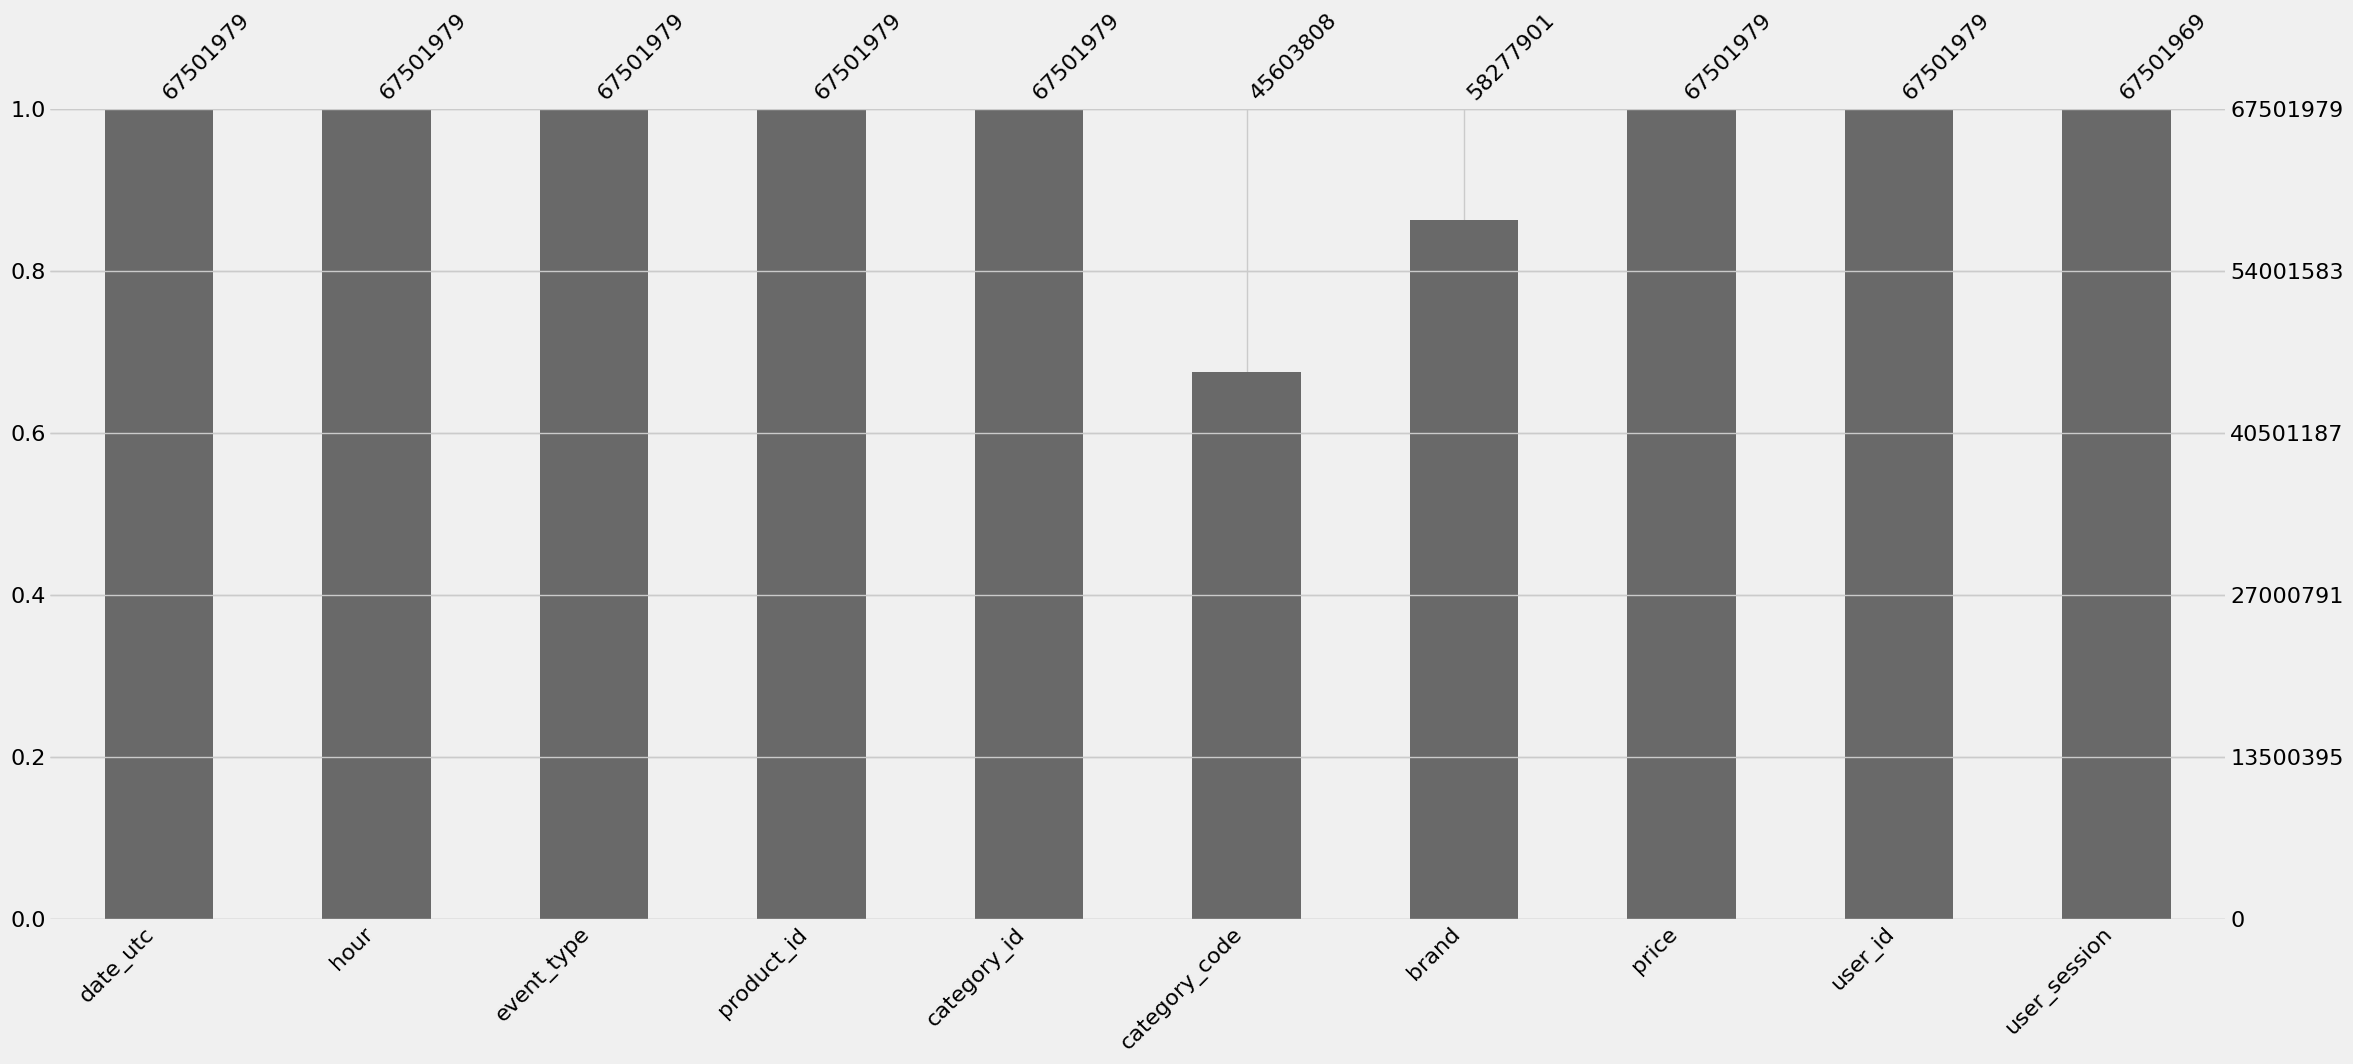

In [10]:
# visualizing null values
msno.bar(df2)
plt.show()

In [5]:
df2 = df2.fillna('unknown')
df2.isna().sum()

date_utc         0
hour             0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [6]:
df2.drop_duplicates()

,date_utc,hour,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01,0,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01,0,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01,0,view,17302664,2053013553853497655,unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01,0,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01,0,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...,...
67501970,2019-11-30,23,view,16800304,2053013558316237377,furniture.kitchen.table,aero,"1,106.85",579175262,b8ff34a9-41be-4497-b373-408c6e02b952
67501971,2019-11-30,23,view,8800713,2053013555573162395,electronics.telephone,prestigio,8.37,579968742,e4bfecbc-8a99-437d-b6b8-b5dfbd87bf78
67501972,2019-11-30,23,view,12301059,2053013556311359947,construction.tools.drill,bosch,266.16,562661595,7165dc28-9cba-40a0-9ed8-76fd909ccb3b
67501973,2019-11-30,23,view,10502879,2053013553199186187,unknown,unknown,29.6,514007176,941ff09f-c5da-49dd-8501-70c950202a4a


In [13]:
visitors = (df2.groupby('event_type')
            ['user_id'].agg(['count'])
            .sort_values(by='count', ascending=False)
            .rename(columns={"count":"count_of_users"})
            .reset_index())
visitors['prcnt'] = (100 * visitors['count_of_users'] / visitors['count_of_users'].sum()).round(1)
print(visitors)

px.pie(visitors, values='prcnt', names='event_type' ,template='plotly_dark')

  event_type  count_of_users  prcnt
0       view        63556110   94.2
1       cart         3028930    4.5
2   purchase          916939    1.4


In [7]:
# engagement of customers towards the store (view, cart, purchase) count
activity = df2.groupby(['date_utc','hour'])['user_id'].agg(['count']).reset_index().sort_values(by=['date_utc','hour'])
activity['time'] = pd.to_datetime(activity['hour'], format='%H').dt.strftime('%I %p')
activity['week_day'] = activity['date_utc'].dt.day_name()
activity['day'] = activity['date_utc'].dt.day_of_week
activity

,date_utc,hour,count,time,week_day,day
0,2019-11-01,0,10887,12 AM,Friday,4
1,2019-11-01,1,14000,01 AM,Friday,4
2,2019-11-01,2,32498,02 AM,Friday,4
3,2019-11-01,3,49348,03 AM,Friday,4
4,2019-11-01,4,61480,04 AM,Friday,4
...,...,...,...,...,...,...
715,2019-11-30,19,64202,07 PM,Saturday,5
716,2019-11-30,20,40506,08 PM,Saturday,5
717,2019-11-30,21,23230,09 PM,Saturday,5
718,2019-11-30,22,14195,10 PM,Saturday,5


In [8]:
activity.describe()

,date_utc,hour,count,day
count,720,720.0,720.0,720.0
mean,2019-11-15 12:00:00,11.5,"93,752.7486111111",3.1
min,2019-11-01 00:00:00,0.0,516.0,0.0
25%,2019-11-08 00:00:00,5.75,"40,401.75",1.0
50%,2019-11-15 12:00:00,11.5,"87,734.5",3.0
75%,2019-11-23 00:00:00,17.25,"107,092.0",5.0
max,2019-11-30 00:00:00,23.0,"480,916.0",6.0
std,NaN,6.926998639597835,"81,963.68133221693",1.9736793792488998


In [15]:
month_activity = activity.groupby('date_utc')['count'].agg(['sum']).reset_index()
fig = px.bar(month_activity, x='date_utc', y='sum', title="Sum of Users Over the Month", template='plotly_dark')
fig.update_xaxes(tickmode='linear')
fig.show()

week_activity = activity.groupby(['week_day', 'day'])['count'].agg(['mean']).round().astype('uint32').rename(columns={'mean':'average_user_by_day'}).sort_values(by='day').reset_index()
fig1 = px.line(week_activity, x='week_day', y='average_user_by_day', text='average_user_by_day', title="Average User Count by Day", template='plotly_dark')
fig1.update_xaxes(type='category')
fig1.show()

time_activity = activity.groupby(['hour', 'time'])['count'].agg(['mean']).round().astype('uint32').rename(columns={'mean':'average_users_by_hour'}).reset_index()
fig2 = px.line(time_activity, x='time', y='average_users_by_hour', title="Average User Count by Hour", template='plotly_dark')
fig2.update_xaxes(tickmode='linear', type='category')
fig2.show()